In [ ]:
import pandas as pd

spam_1 = pd.read_csv('/content/drive/MyDrive/ColabML/spam.csv', encoding="latin1")
spam_2 = pd.read_csv('/content/drive/MyDrive/ColabML/SPAM text message 20170820 - Data.csv', encoding="latin1")

dataset_1 = pd.DataFrame(spam_1, columns=["v1","v2"]).rename(columns={"v1": "label", "v2": "text"})
dataset_2 = pd.DataFrame(spam_2, columns=["Category","Message"]).rename(columns={"Category": "label", "Message": "text"})

all_spam_1 = dataset_1[dataset_1["label"] == "spam"]
all_spam_2 = dataset_2[dataset_2["label"] == "spam"]

all_spam = pd.concat([all_spam_1, all_spam_2])
all_spam["text"]

,text
2,Free entry in 2 a wkly comp to win FA Cup fina...
5,FreeMsg Hey there darling it's been 3 week's n...
8,WINNER!! As a valued network customer you have...
9,Had your mobile 11 months or more? U R entitle...
11,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,Had your contract mobile 11 Mnths? Latest Moto...
5566,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedder.encode(all_spam['text'].tolist(), show_progress_bar=True)


Batches:   0%|          | 0/47 [00:00<?, ?it/s]

In [ ]:
import umap

dim_reducer = umap.UMAP(
    n_neighbors=15,
    n_components=10,
    random_state=42
)
embeddings_reduced = dim_reducer.fit_transform(embeddings)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
from sklearn.cluster import HDBSCAN

clusterer = HDBSCAN(
    min_cluster_size=30,
    metric="euclidean",
    cluster_selection_method="eom"
)

cluster_labels = clusterer.fit_predict(embeddings_reduced)

In [ ]:
import numpy as np

labels = np.unique(cluster_labels)
all_spam["c-label"] = cluster_labels

labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [ ]:
all_spam[all_spam["c-label"] == 3].head(20)

,label,text,c-label
366,spam,"Update_Now - Xmas Offer! Latest Motorola, Sony...",3
384,spam,Double mins and txts 4 6months FREE Bluetooth ...,3
869,spam,What do U want for Xmas? How about 100 free te...,3
1006,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...,3
1377,spam,Double Mins & Double Txt & 1/2 price Linerenta...,3
1847,spam,FREE NOKIA Or Motorola with upto 12mths 1/2pri...,3
2342,spam,Double your mins & txts on Orange or 1/2 price...,3
2895,spam,pdate_Now - Double mins and 1000 txts on Orang...,3
2978,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No...",3
3528,spam,Xmas & New Years Eve tickets are now on sale f...,3


In [ ]:
for i, msg in enumerate(all_spam[all_spam["c-label"] == 7]["text"].head(20), 1):
    print(f"{i}: {msg}\n")

1: WINNER!! As a valued network customer you have been selected to receivea ï¿½900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

2: URGENT! You have won a 1 week FREE membership in our ï¿½100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18

3: As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a ï¿½1500 Bonus Prize, call 09066364589

4: Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or ï¿½1000. To claim txt DIS to 87121 18+6*ï¿½1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ

5: Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed ï¿½1000 cash or ï¿½5000 prize!

6: GENT! We are trying to contact you. Last weekends draw shows that you won a ï¿½1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm

7: URGENT! Your Mobile No. was award

1. Ringtone spam
2. Mobile phone scam
3. Bluetooth headset scam
4. Call-back scam
5. Cash scam
6. Video-related spam
7. Sex spam
8. Subscription scam
9. Call-now scam
10. Free-gift scam
11. Free-cash scam
12. Again, free-cash!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Map numeric labels to categories (if needed)
label_map = {
    1: "Ringtone spam",
    2: "Mobile phone scam",
    3: "Bluetooth headset scam",
    4: "Call-back scam",
    5: "Cash scam",
    6: "Video-related spam",
    7: "Sex spam",
    8: "Subscription scam"
}
all_spam['category'] = all_spam['c-label'].map(label_map)

In [ ]:
# Remove rows where c-label is -1 or 0
all_spam = all_spam[~all_spam['c-label'].isin([-1, 0])]

# Optional: reset the index
all_spam = all_spam.reset_index(drop=True)

In [ ]:
all_spam.shape

(794, 4)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    all_spam['text'], all_spam['c-label'], test_size=0.2, random_state=42, stratify=all_spam['c-label']
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)
print(classification_report(y_test, y_pred, target_names=all_spam['category'].unique()))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                        precision    recall  f1-score   support

              Sex spam       0.86      1.00      0.93        31
     Mobile phone scam       1.00      0.78      0.88         9
         Ringtone spam       1.00      0.83      0.91         6
             Cash scam       1.00      0.67      0.80         9
    Video-related spam       1.00      0.56      0.72        16
Bluetooth headset scam       1.00      1.00      1.00         8
     Subscription scam       0.86      1.00      0.92        67
        Call-back scam       1.00      0.77      0.87        13

              accuracy                           0.90       159
             macro avg       0.97      0.83      0.88       159
          weighted avg       0.91      0.90      0.89       159



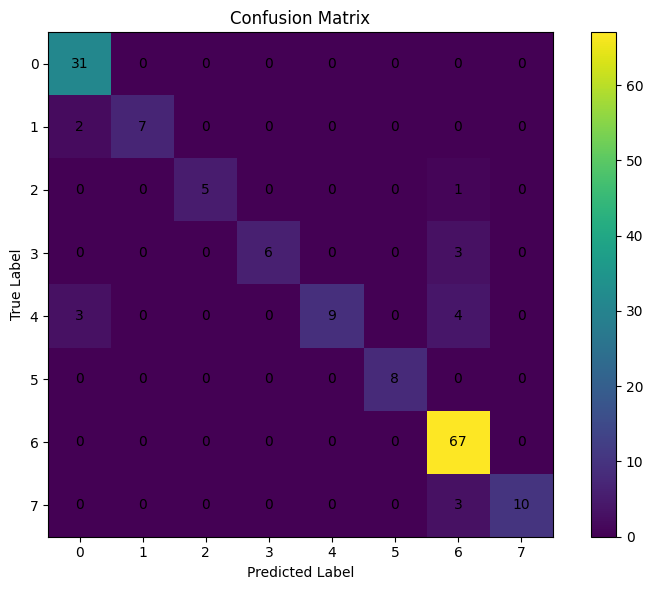

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Annotate cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.colorbar()
plt.tight_layout()
plt.show()

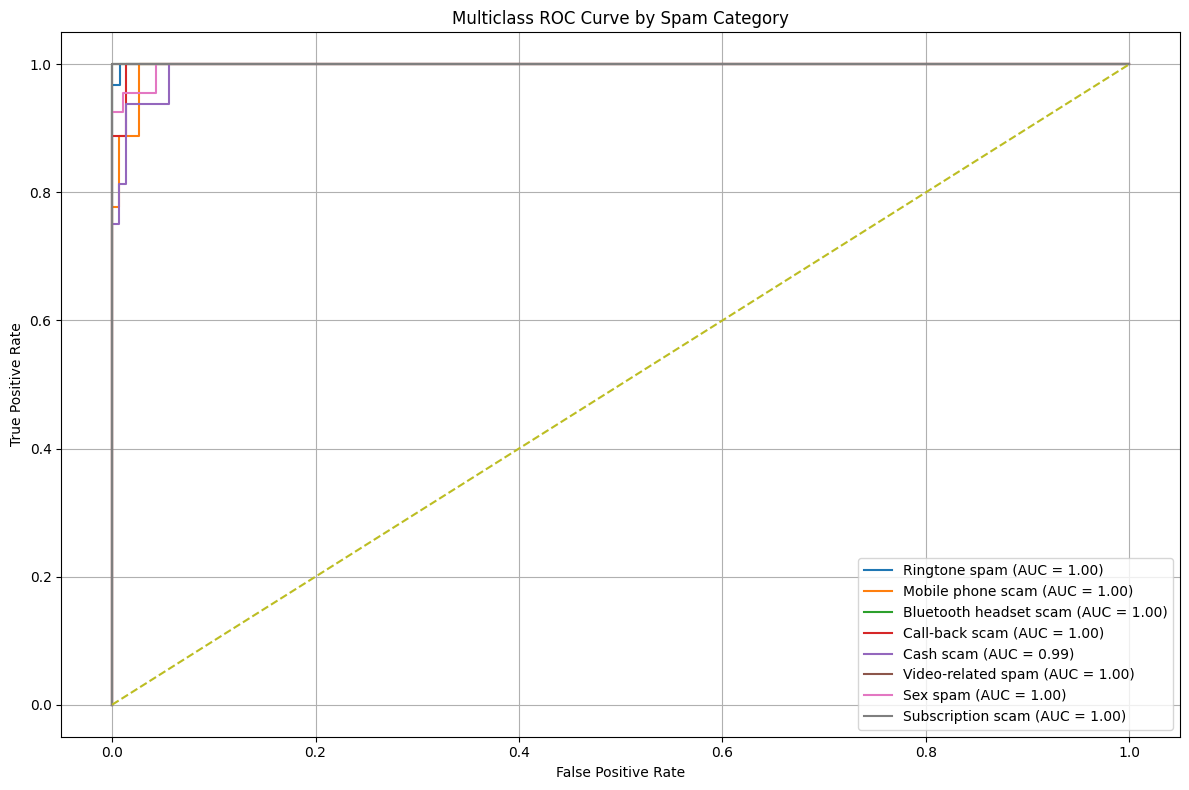

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Your label map
label_map = {
    1: "Ringtone spam",
    2: "Mobile phone scam",
    3: "Bluetooth headset scam",
    4: "Call-back scam",
    5: "Cash scam",
    6: "Video-related spam",
    7: "Sex spam",
    8: "Subscription scam"
}

# Unique classes
classes = np.unique(y_test)

# Binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities
y_score = model.predict_proba(X_test_vect)

# Plot ROC curves with category names
plt.figure(figsize=(12, 8))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    # Use mapped label here
    category_name = label_map[class_label]

    plt.plot(fpr, tpr, label=f"{category_name} (AUC = {roc_auc:.2f})")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle="--")

plt.title("Multiclass ROC Curve by Spam Category")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()